## 4(a)

Mean of θ = 54.86666666666667
Mean of λ1 = 3.289895459661857
Mean of λ2 = 3.271441861240158


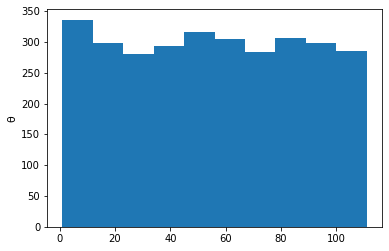

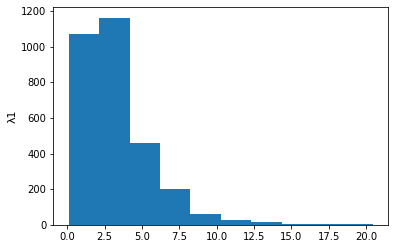

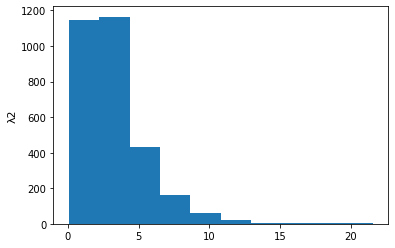

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

iter = 3000
lambda1 = []
lambda2 = []
theta = []
for i in range(iter):
    theta.append(np.random.randint(1, 112))
    a1 = np.random.gamma(shape=10, scale=1/10)
    lambda1.append(np.random.gamma(shape=3, scale=1/a1))

    a2 = np.random.gamma(shape=10, scale=1/10)
    lambda2.append(np.random.gamma(shape=3, scale=1/a2))
print(f"Mean of θ = {np.mean(theta)}\nMean of λ1 = {np.mean(lambda1)}\nMean of λ2 = {np.mean(lambda2)}")
plt.hist(theta)
plt.ylabel('θ', fontsize="11")
plt.show()
plt.hist(lambda1)
plt.ylabel('λ1', fontsize="11")
plt.show()
plt.hist(lambda2)
plt.ylabel('λ2', fontsize="11")
plt.show()

## 4(b)

Mean of θ = 54.71
Mean of λ1 = 3.369011645294816
Mean of λ2 = -2.370182829332286


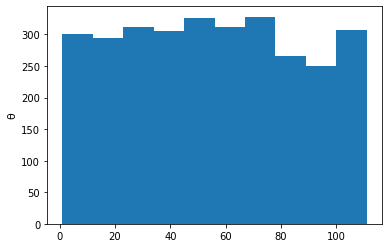

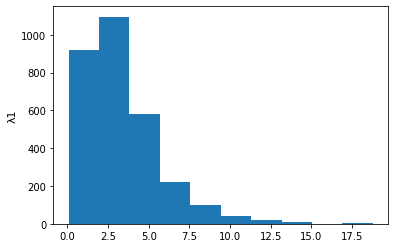

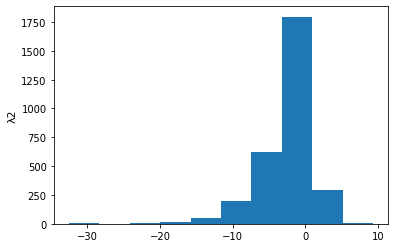

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

iter = 3000
lambda1 = []
lambda2 = []
theta = []
for i in range(iter):
    theta.append(np.random.randint(1, 112))
    a1 = np.random.gamma(shape=10, scale=1/10)
    lambda1.append(np.random.gamma(shape=3, scale=1/a1))
    lambda2.append(lambda1[i] * np.random.uniform(np.log(1/8), np.log(2)))
print(f"Mean of θ = {np.mean(theta)}\nMean of λ1 = {np.mean(lambda1)}\nMean of λ2 = {np.mean(lambda2)}")
plt.hist(theta)
plt.ylabel('θ', fontsize="11")
plt.show()
plt.hist(lambda1)
plt.ylabel('λ1', fontsize="11")
plt.show()
plt.hist(lambda2)
plt.ylabel('λ2', fontsize="11")
plt.show()

## 4(c)

Mean of θ = 56.10666666666667
Mean of λ1 = 0.33042836770939954
Mean of λ2 = 0.2616818074413835


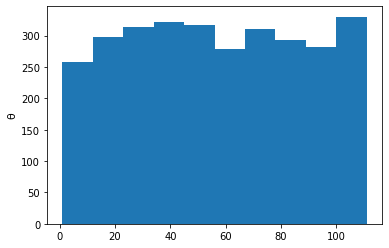

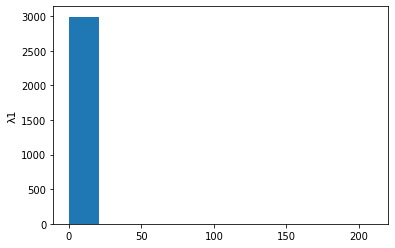

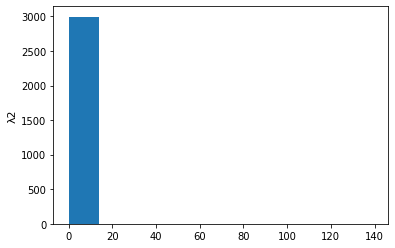

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

iter = 3000
lambda1 = []
lambda2 = []
theta = []
for i in range(iter):
    theta.append(np.random.randint(1, 112))
    a1 = np.random.uniform(0, 100)
    lambda1.append(np.random.gamma(shape=3, scale=1/a1))

    a2 = np.random.uniform(0, 100)
    lambda2.append(np.random.gamma(shape=3, scale=1/a2))
print(f"Mean of θ = {np.mean(theta)}\nMean of λ1 = {np.mean(lambda1)}\nMean of λ2 = {np.mean(lambda2)}")
plt.hist(theta)
plt.ylabel('θ', fontsize="11")
plt.show()
plt.hist(lambda1)
plt.ylabel('λ1', fontsize="11")
plt.show()
plt.hist(lambda2)
plt.ylabel('λ2', fontsize="11")
plt.show()

## 4(e)

Mean of λ1 : 1.6449574841251575
Mean of λ2 : 2.5654023249617666
Standard deviation of λ1 : 0.3795574966632516
Standard deviation of λ2 : 1.551612671484141
Standard error of λ1 : 0.1897787483316258
Standard error of λ2 : 0.14930399892656718


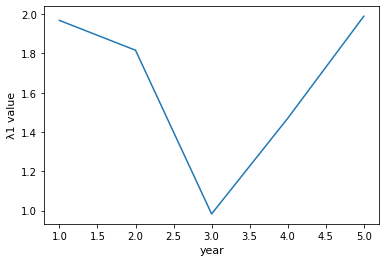

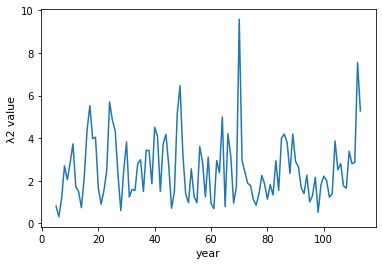

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

def gibbsSampler():
    theta = np.random.randint(1, 112)
    x_arr, lambda1_arr, lambda2_arr = [], [], []
    x_arr.append(0)
    a1 = np.random.gamma(shape=10, scale=1/10)
    lambda1_arr.append(np.random.gamma(shape=3, scale=1/a1))
    for i in range(theta):
        xi = np.random.poisson(lam=lambda1_arr[i])
        x_arr.append(xi)
        lambda1_arr.append(np.random.gamma(shape=3+xi, scale=1/(a1+1)))

    x_arr.append(0)
    a2 = np.random.gamma(shape=10, scale=1/10)
    lambda2_arr.append(np.random.gamma(shape=3, scale=1/a2))
    for i in range(112 - theta):
        xi = np.random.poisson(lam=lambda2_arr[i])
        x_arr.append(xi)
        lambda2_arr.append(np.random.gamma(shape=3+xi, scale=1/(a1+1)))

    return theta, lambda1_arr, lambda2_arr

theta, lambda1, lambda2 = gibbsSampler()
print(f"Mean of λ1 : {np.mean(lambda1)}\nMean of λ2 : {np.mean(lambda2)}")
print(f"Standard deviation of λ1 : {np.std(lambda1)}\nStandard deviation of λ2 : {np.std(lambda2)}")
print(f"Standard error of λ1 : {np.std(lambda1)/(theta**0.5)}\nStandard error of λ2 : {np.std(lambda2)/((112-theta)**0.5)}")

x1 = []
x2 = []
for i in range(len(lambda1)):
    x1.append(i+1)
for i in range(len(lambda2)):
    x2.append(theta+i+1)
plt.plot(x1, lambda1)
plt.xlabel('year', fontsize="11")
plt.ylabel('λ1 value', fontsize="11")
plt.show()
plt.plot(x2, lambda2)
plt.xlabel('year', fontsize="11")
plt.ylabel('λ2 value', fontsize="11")
plt.show()

## 4(f)

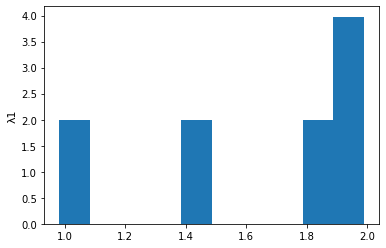

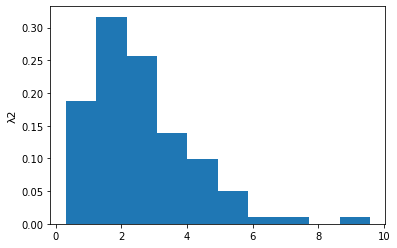

λ1 statistics:
count    5.000000
mean     1.644957
std      0.424358
min      0.983174
25%      1.469364
50%      1.815852
75%      1.967625
max      1.988774
dtype: float64
λ2 statistics:
count    109.000000
mean       2.565402
std        1.558780
min        0.306494
25%        1.397507
50%        2.251526
75%        3.419249
max        9.577643
dtype: float64


In [20]:
plt.hist(lambda1, density=True)
plt.ylabel('λ1', fontsize="11")
plt.show()
plt.hist(lambda2, density=True)
plt.ylabel('λ2', fontsize="11")
plt.show()

s1 = pd.Series(lambda1)
print("λ1 statistics:")
print(s1.describe())
s2 = pd.Series(lambda2)
print("λ2 statistics:")
print(s2.describe())